# Quantum. Lab 2

Author:
- **Nikita Makarevich (Student ID: 153989)**

$$
\renewcommand{\bra}[1]{\langle #1|}
\renewcommand{\ket}[1]{|#1\rangle}
\renewcommand{\braket}[2]{\langle #1|#2\rangle}
$$

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
import qiskit.visualization as qvis
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass


# selection of quantum simulator (or processor)
backend = Aer.get_backend("qasm_simulator")

In [2]:
def plot_circuit_and_results(circuit: QuantumCircuit, counts: list[dict]):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    circuit.draw("mpl", ax=axs[0])
    qvis.plot_histogram(
        counts,
        ax=axs[1],
    )
    qvis.plot_distribution(
        counts,
        legend=[f"Execution {i + 1}" for i in range(3)],
        ax=axs[2],
    )
    axs[0].set_title("Circuit")
    axs[1].set_title("Distribution [counts]")
    axs[2].set_title("Probabilities")


def run_experiments(
    backend, circuit: QuantumCircuit, *, shots: int = 2048, runs: int = 3
) -> list[dict]:
    return [
        backend.run(circuit, shots=shots).result().get_counts() for _ in range(runs)
    ]

In [3]:
@dataclass
class Setup:
    n: int
    qx: QuantumRegister
    cx: ClassicalRegister
    circuit: QuantumCircuit

    @classmethod
    def create(cls) -> "Setup":
        n = 2
        qx = QuantumRegister(n, "q")
        cx = ClassicalRegister(n, "c")
        circ = QuantumCircuit(qx, cx)
        return cls(n, qx, cx, circ)

In [4]:
def connect_fi_plus(setup: Setup) -> None:
    setup.circuit.h(setup.qx[0])
    setup.circuit.cx(setup.qx[0], setup.qx[1])


def connect_fi_minus(setup: Setup) -> None:
    setup.circuit.x(setup.qx[0])
    connect_fi_plus(setup)


def connect_psi_plus(setup: Setup) -> None:
    setup.circuit.x(setup.qx[1])
    connect_fi_plus(setup)


def connect_psi_minus(setup: Setup) -> None:
    setup.circuit.x(setup.qx[0])
    setup.circuit.x(setup.qx[1])
    connect_fi_plus(setup)


## Measurements


def connect_measure_zz(setup: Setup) -> None:
    setup.circuit.measure(setup.qx[0], setup.cx[0])
    setup.circuit.measure(setup.qx[1], setup.cx[1])


def connect_measure_xx(setup: Setup) -> None:
    setup.circuit.h(setup.qx[0])
    setup.circuit.h(setup.qx[1])
    connect_measure_zz(setup)


def connect_measure_yy(setup: Setup) -> None:
    setup.circuit.sdg(setup.qx[0])
    setup.circuit.sdg(setup.qx[1])
    connect_measure_xx(setup)


def connect_measure_xz(setup: Setup) -> None:
    setup.circuit.measure(setup.qx[0], setup.cx[0])
    setup.circuit.h(setup.qx[1])
    setup.circuit.measure(setup.qx[1], setup.cx[1])

## Task 1 - Fi Plus

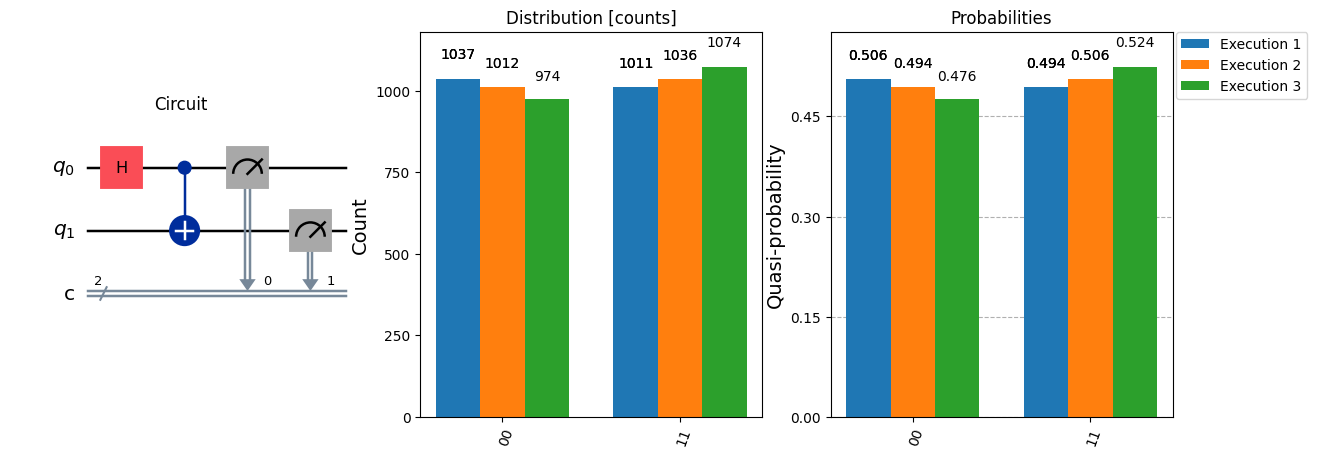

In [5]:
setup = Setup.create()
connect_fi_plus(setup)
connect_measure_zz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

## Task 2 - Fi Minus

### Calculation (matrix form):

$$
CX (I \otimes H) \ket{01} =
$$

$$
(\text{The value of } CX (I \otimes H) \text{ was taken from slides})
$$

$$
=

\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 & 0 & 0 \\
0 & 0 & -1 & -1 \\
0 & 0 & -1 & -1 \\
1 & -1 & 0 & 0 \\
\end{bmatrix}

\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
\end{bmatrix}

=

\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
0 \\
0 \\
-1 \\
\end{bmatrix}

=
\frac{1}{\sqrt{2}}
(\ket{00} - \ket{11})

$$

### Experiment

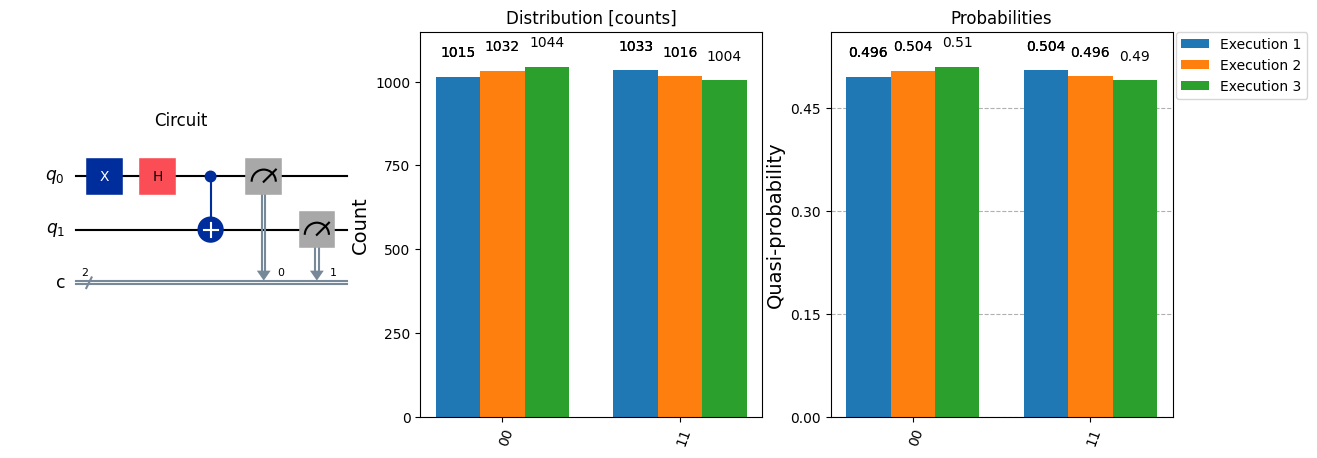

In [6]:
setup = Setup.create()
connect_fi_minus(setup)
connect_measure_zz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

## Task 3 - Psi Plus

### Calculation (operator form)

- $\ket{00} \xrightarrow{X_{q1}}$
- $\ket{10} = \ket{1} \otimes \ket{0} \xrightarrow{I \otimes H}$
- $\ket{1} \otimes H\ket{0} = \ket{1} \otimes (\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})) = \frac{1}{\sqrt{2}}(\ket{10} + \ket{11}) \xrightarrow{CX_{q0q1}}$
- $\frac{1}{\sqrt{2}}(C_x\ket{10} + C_x\ket{11}) = \frac{1}{\sqrt{2}}(\ket{10} + \ket{01})$

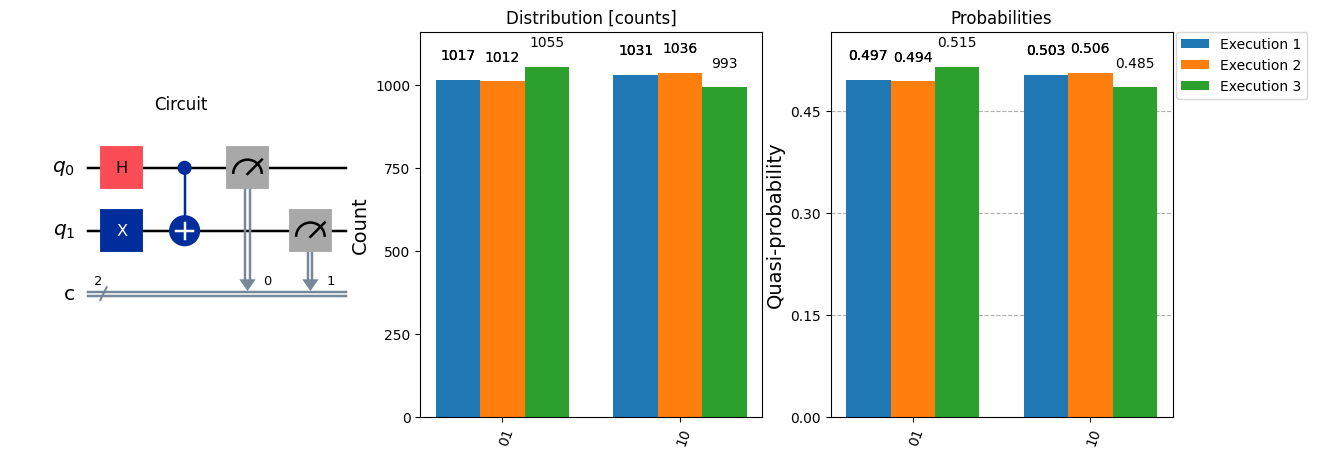

In [7]:
setup = Setup.create()
connect_psi_plus(setup)
connect_measure_zz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

## Task 4 - Psi Minus

### Calculation (operator form)

- $\ket{00} \xrightarrow{X_{q0}}$
- $\ket{01} \xrightarrow{X_{q1}}$
- $\ket{11} = \ket{1} \otimes \ket{1} \xrightarrow{I \otimes H}$
- $\ket{1} \otimes H\ket{1} = \ket{1} \otimes \frac{1}{\sqrt{2}}(\ket{0} - \ket{1}) = \frac{1}{\sqrt{2}}(\ket{10} - \ket{11}) \xrightarrow{CX_{q0q1}}$
- $\frac{1}{\sqrt{2}}(CX\ket{10} - CX\ket{11}) = \frac{1}{\sqrt{2}}(\ket{10} - \ket{01})$


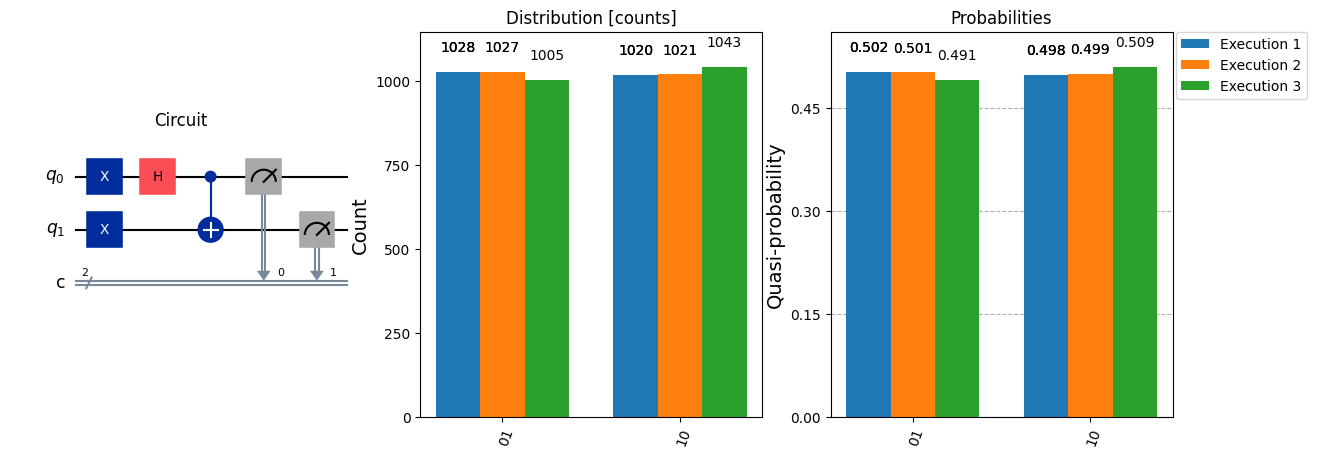

In [8]:
setup = Setup.create()
connect_psi_minus(setup)
connect_measure_zz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

## Task 5 - XX measurements

### 5-1

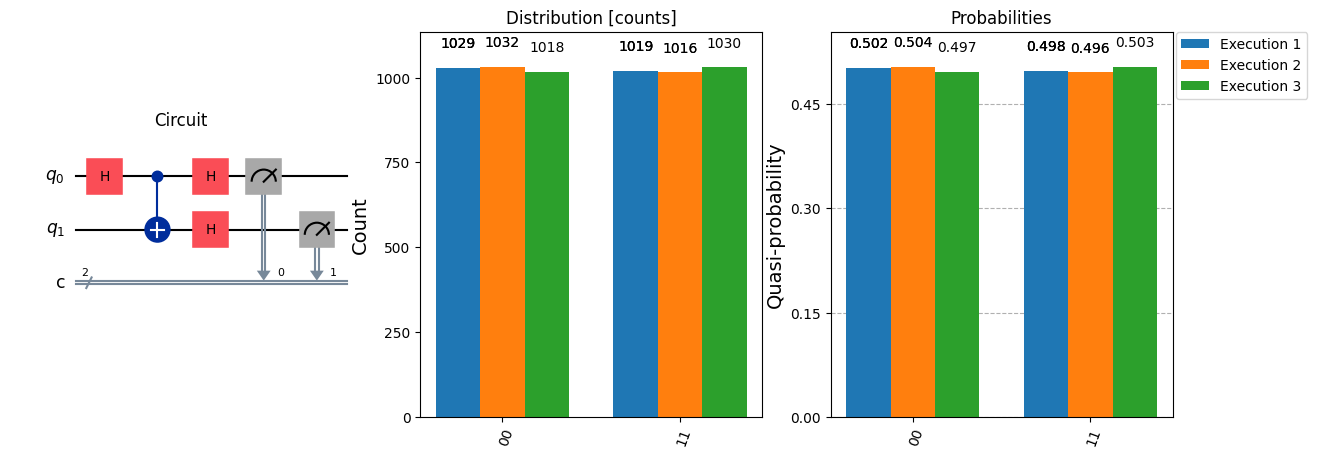

In [9]:
setup = Setup.create()
connect_fi_plus(setup)
connect_measure_xx(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 5-2

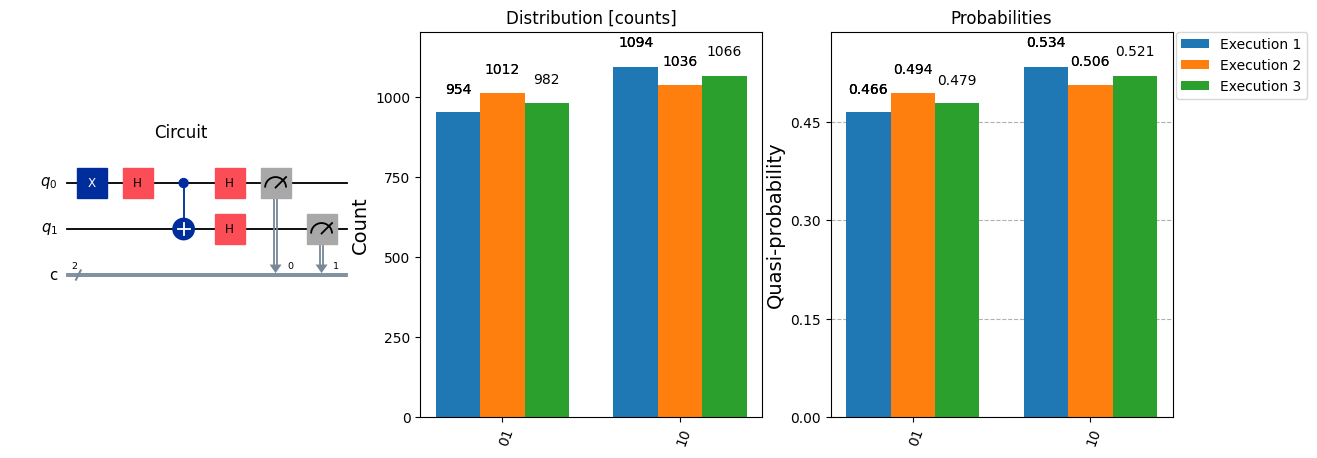

In [10]:
setup = Setup.create()
connect_fi_minus(setup)
connect_measure_xx(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 5-3

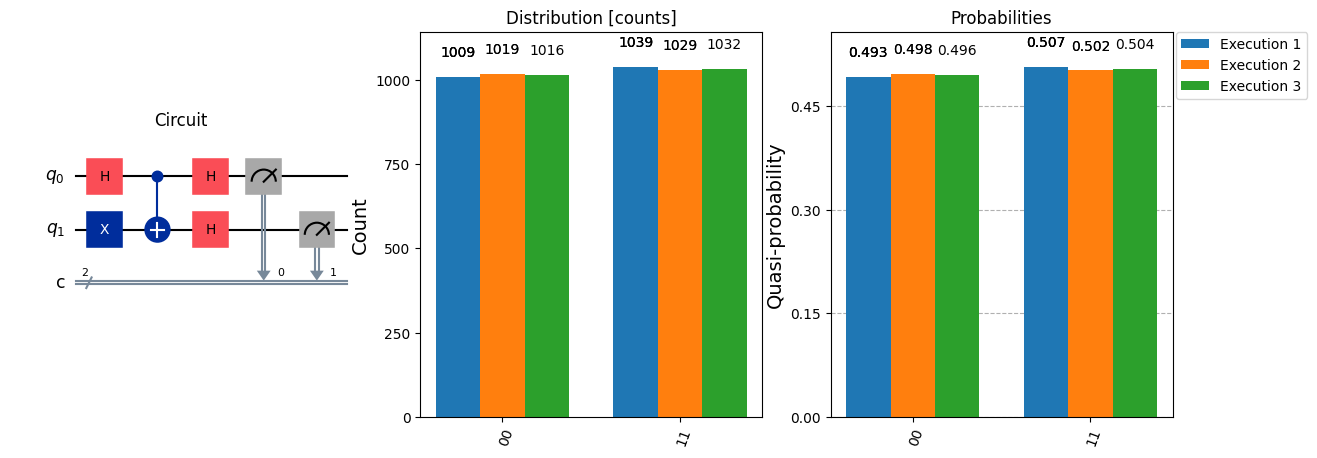

In [11]:
setup = Setup.create()
connect_psi_plus(setup)
connect_measure_xx(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 5-4

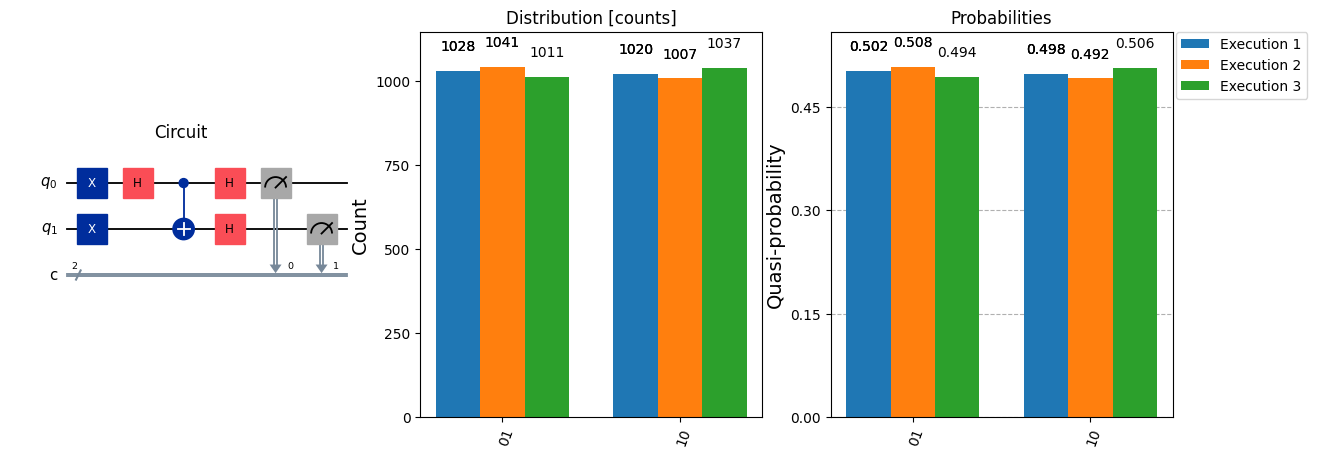

In [12]:
setup = Setup.create()
connect_psi_minus(setup)
connect_measure_xx(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

## Task 6 - YY measurements

### 6-1

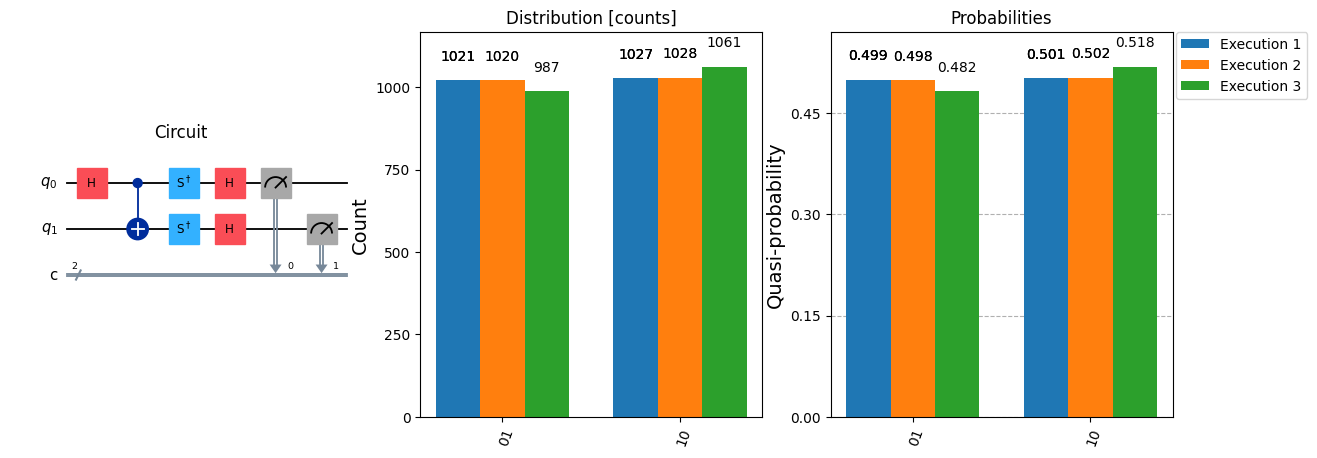

In [13]:
setup = Setup.create()
connect_fi_plus(setup)
connect_measure_yy(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 6-2

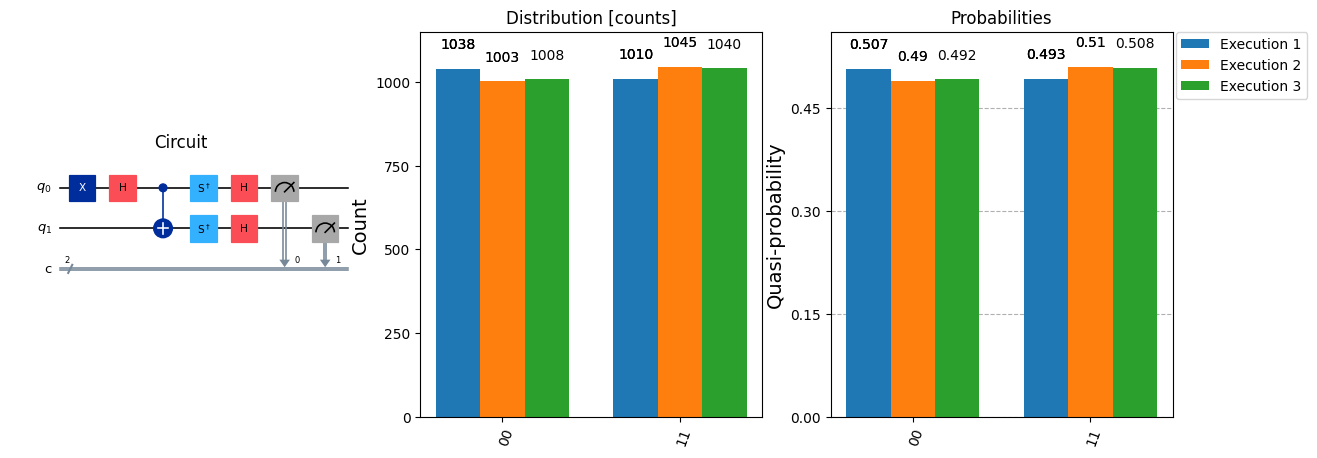

In [14]:
setup = Setup.create()
connect_fi_minus(setup)
connect_measure_yy(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 6-3

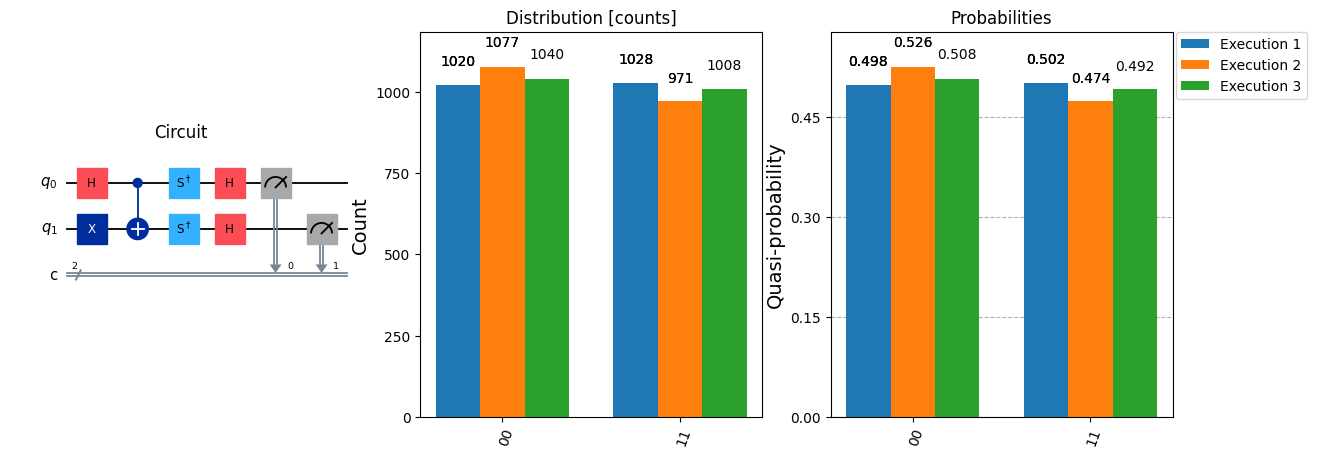

In [15]:
setup = Setup.create()
connect_psi_plus(setup)
connect_measure_yy(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 6-4

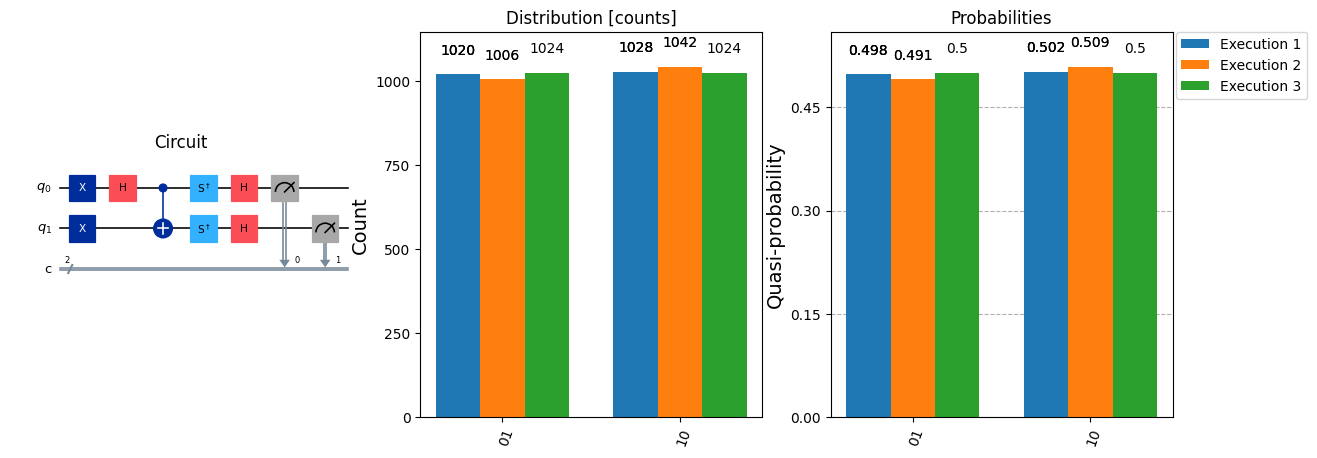

In [16]:
setup = Setup.create()
connect_psi_minus(setup)
connect_measure_yy(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

## Task 7 - XZ measurements

### 7-1

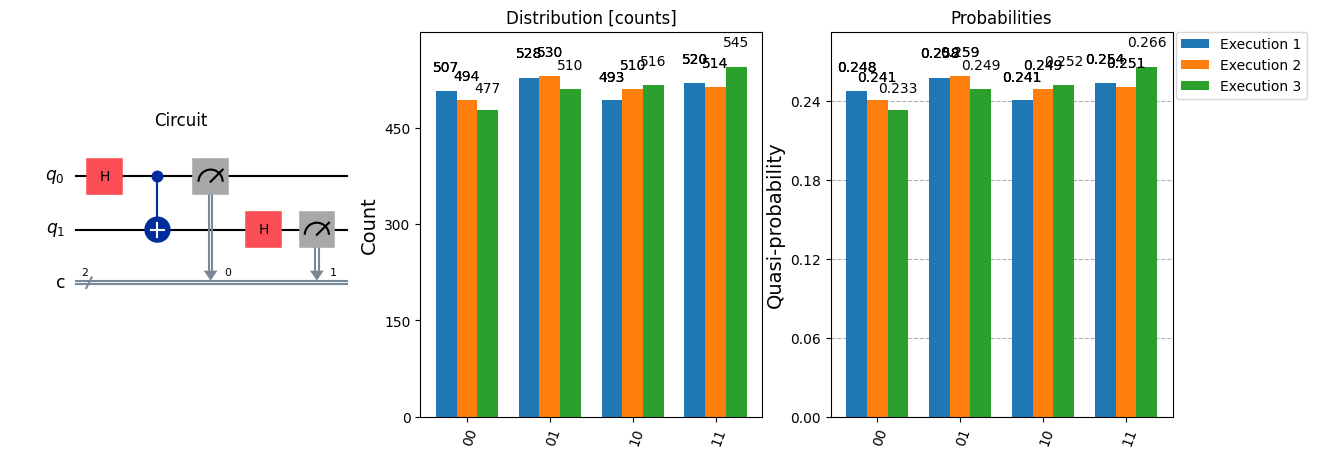

In [17]:
setup = Setup.create()
connect_fi_plus(setup)
connect_measure_xz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 7-2

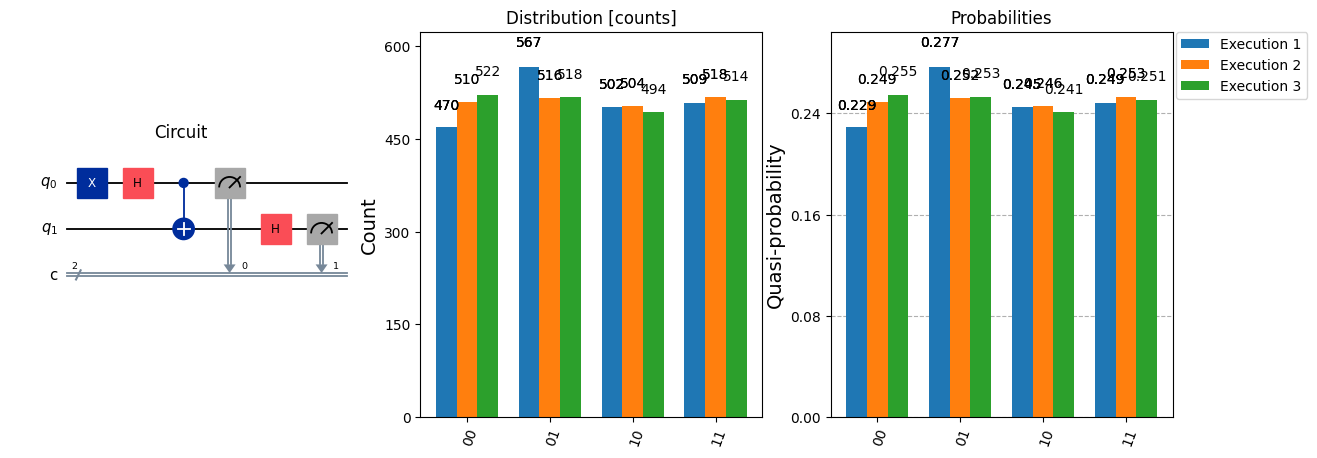

In [18]:
setup = Setup.create()
connect_fi_minus(setup)
connect_measure_xz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 7-3

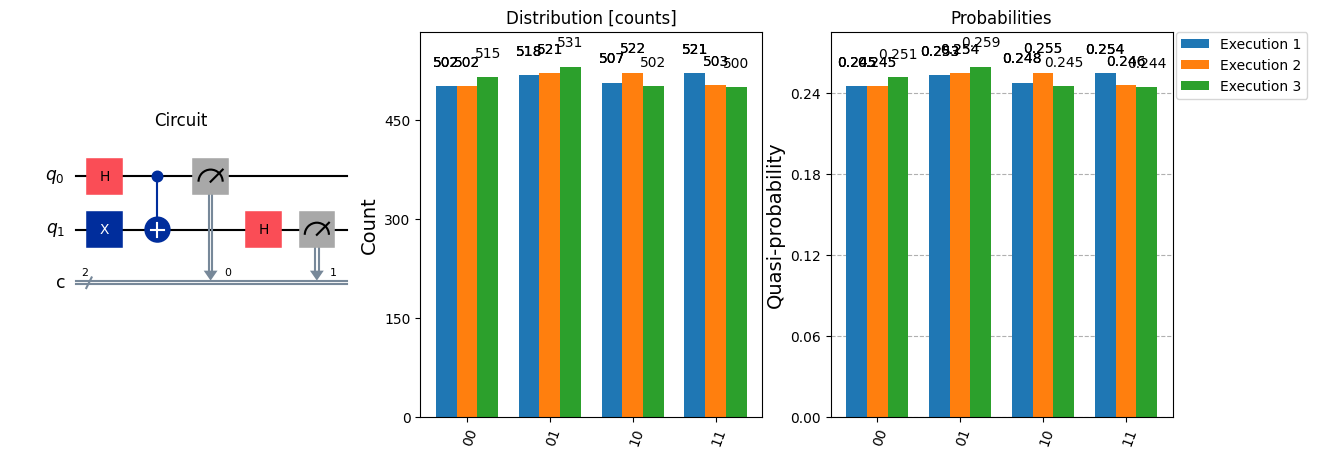

In [19]:
setup = Setup.create()
connect_psi_plus(setup)
connect_measure_xz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)

### 7-4

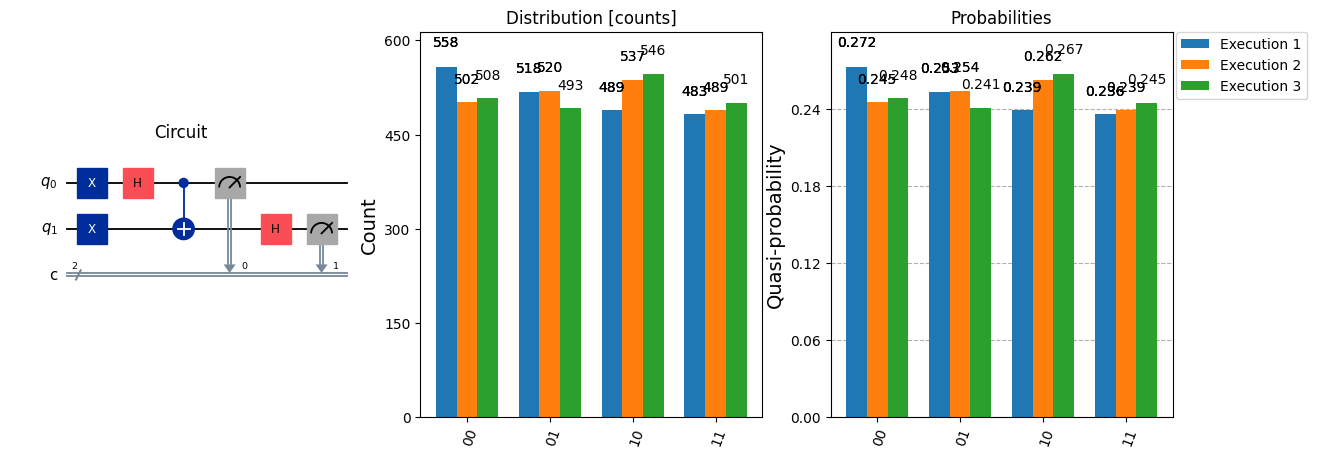

In [20]:
setup = Setup.create()
connect_psi_minus(setup)
connect_measure_xz(setup)

results = run_experiments(backend, setup.circuit)
plot_circuit_and_results(setup.circuit, results)